In [67]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [68]:
# These are the four sneakers that I will be using as first examples for learning about the best time to buy a pair of sneakers on stockx.com

aj4tscj = 'C:/StockX/Jordan 4 Retro Travis Scott Cactus Jack.json'
aj1hts = 'C:/StockX/Jordan 1 Retro High Travis Scott.json'
aj1hbt = 'C:/StockX/Jordan 1 Retro High Bred Toe.json'
ajhulabt = 'C:/StockX/Jordan 1 Retro High Union Los Angeles Blue Toe.json'

snkrs = [ aj4tscj, ajhulabt, aj1hts, aj1hbt ]

In [69]:
# Put them into a dataframe

snkrlist = pd.DataFrame()
for snkr in snkrs:
    data = json.load(open(snkr))
    df = pd.DataFrame(data["ProductActivity"])
    df['product'] = str(snkr)[10:-5] # Extract string for shoe name
    snkrlist = snkrlist.append(df) # Append dataframes

In [70]:
snkrdf = snkrlist[['product','createdAt','amount','shoeSize']] # Keep only necessary fields
snkrdf['date'] = snkrdf.createdAt.str[:-15] # Extract date from createdAt
snkrdf['time'] = snkrdf.createdAt.str[11:-6] # Extract time from createdAt
snkrdf = snkrdf.sort_values(by=['product', 'createdAt'], ascending = True)
snkrdf['datetime'] = snkrdf.date +' '+ snkrdf.time # Bundle date and time together to form a string
snkrdf.head(2)

C:\Users\jnony\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jnony\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,product,createdAt,amount,shoeSize,date,time,datetime
2530,Jordan 1 Retro High Bred Toe,2018-01-27T20:45:28+00:00,368.0,10.5,2018-01-27,20:45:28,2018-01-27 20:45:28
2529,Jordan 1 Retro High Bred Toe,2018-02-06T15:45:05+00:00,400.0,10.5,2018-02-06,15:45:05,2018-02-06 15:45:05


In [71]:
# Check before changing datetime
snkrdf.dtypes

product       object
createdAt     object
amount       float64
shoeSize      object
date          object
time          object
datetime      object
dtype: object

In [72]:
# Turn datetime string into datetime
snkrdf.datetime = pd.to_datetime( snkrdf.datetime, format = '%Y-%m-%d %H:%M:%S' )

In [73]:
# Confirm that the datetime is now datetime type
snkrdf.dtypes

product              object
createdAt            object
amount              float64
shoeSize             object
date                 object
time                 object
datetime     datetime64[ns]
dtype: object

In [74]:
# Get min and max of datetime
snkrdf.datetime.min()
snkrdf.datetime.max()

Timestamp('2019-10-13 04:34:26')

In [75]:
# seems like imma have to reshape and use only date without the time to plot by shoe
# That is if I wanna plot them all in one graph
# Maybe I should start with individual graphs


## Found this code for reshaping
https://stackoverflow.com/questions/42744189/python-pandas-plot-using-dataframe-column-values
    

import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

high = data[["High", "name"]].set_index("name", append=True).High.unstack("name")

# notice here I scale down the BRK-A column so that it will be at the same scale as other columns
high['BRK-A'] = high['BRK-A']/1000
high.head()

SyntaxError: invalid syntax (<ipython-input-75-4fd7f9def54a>, line 7)

4

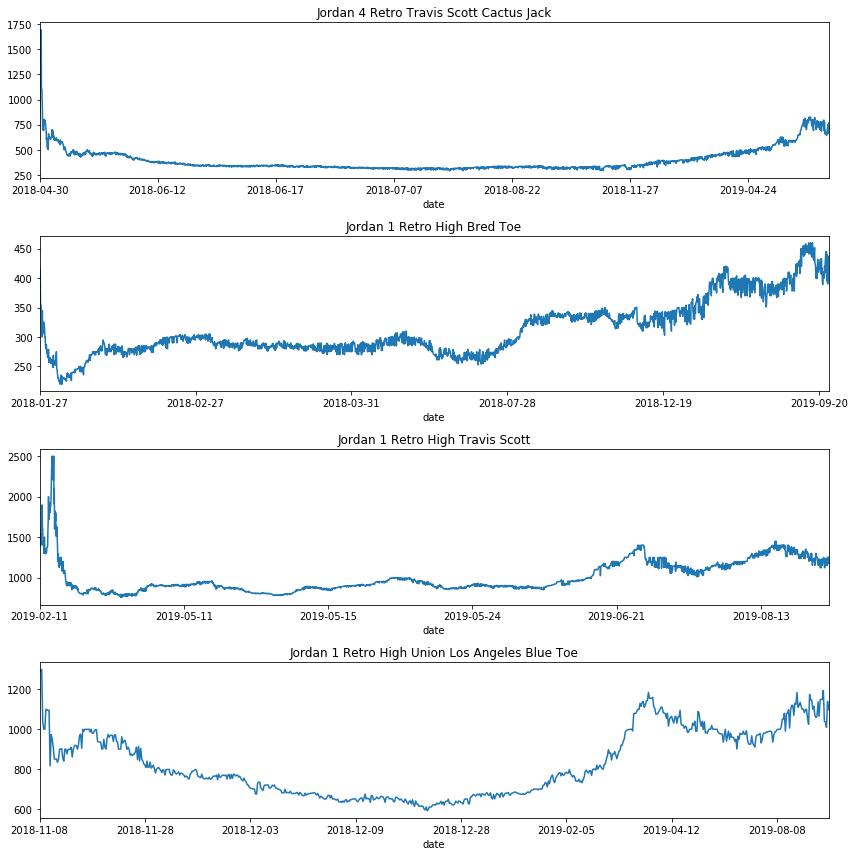

In [91]:
# Can I make this dynamic that I won't have to adjust the number of rows and number of plots?? Some kind of loop?
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)

# Date ( X axis) is not evenly spaced. Fix this.
# Get a Release date column

# Plot
snkrdf[snkrdf['product'] == 'Jordan 4 Retro Travis Scott Cactus Jack'].plot(x='date', y='amount', figsize=(12,12),legend=False, ax=ax1)
ax1.set_title("Jordan 4 Retro Travis Scott Cactus Jack")
# Not sure how there are transactions even before the release date.  I guess that's possible given some people get them in advance but 
# should I exclude them from the dataset?
# I think I should remove any data before release dates so that I can determine how many days or months after release is the best

snkrdf[snkrdf['product'] == 'Jordan 1 Retro High Bred Toe'].plot(x='date', y='amount', legend=False, ax=ax2)
ax2.set_title("Jordan 1 Retro High Bred Toe")

snkrdf[snkrdf['product'] == 'Jordan 1 Retro High Travis Scott'].plot(x='date', y='amount', legend=False, ax=ax3)
ax3.set_title("Jordan 1 Retro High Travis Scott")

snkrdf[snkrdf['product'] == 'Jordan 1 Retro High Union Los Angeles Blue Toe'].plot(x='date', y='amount', legend=False, ax=ax4)
ax4.set_title("Jordan 1 Retro High Union Los Angeles Blue Toe")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()


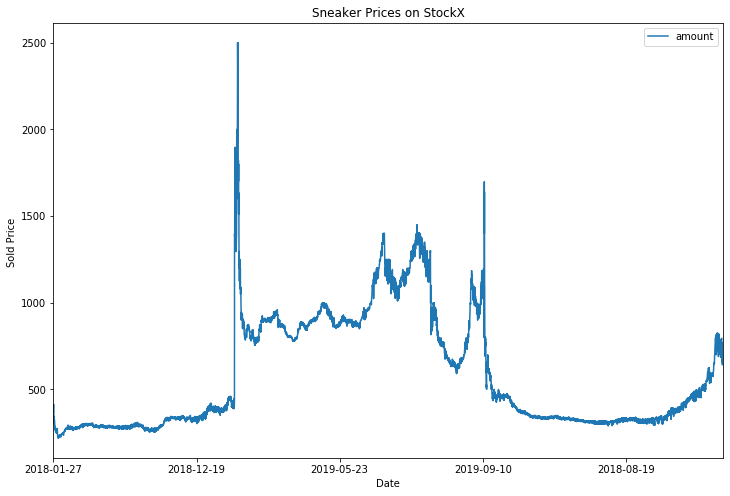

In [65]:
# So it is confirmed, as expected, that the prices of these shoes tend to go up over time.
# Next.............would be......................
# Should I plot them all on the same figure? Or
# Idea 1: get moving average so that the liens are smoothed out and try to get the general time span for the lowest